In [74]:
#import libraries
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns



In [75]:
#load data
df = pd.read_csv("UsArrests.csv")
target = df['City']

print('Data:')
print(df.head(), end='\n\n')

# Preprocess data

# check if there are missing values
print(df.isnull().sum(), end='\n\n')

# check if there are non-numerical features
print(df.info())

Data:
         City  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


This dataset gives us the arrests in each US state per 100,000 residents broken down by assualt, rape and murder. It also provides the percentae of the population living in urban areas. 

A quick view of the dataset and there doesn't appear to be any missing values, all datatypes are correct and column headers are clearly represented.

There are 50 rows and 5 columns. 

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


Assault has a much higher mean and standard deviation than the other variables. It therefore makes sense to scale the data to avoid assualt overpowering the process. 

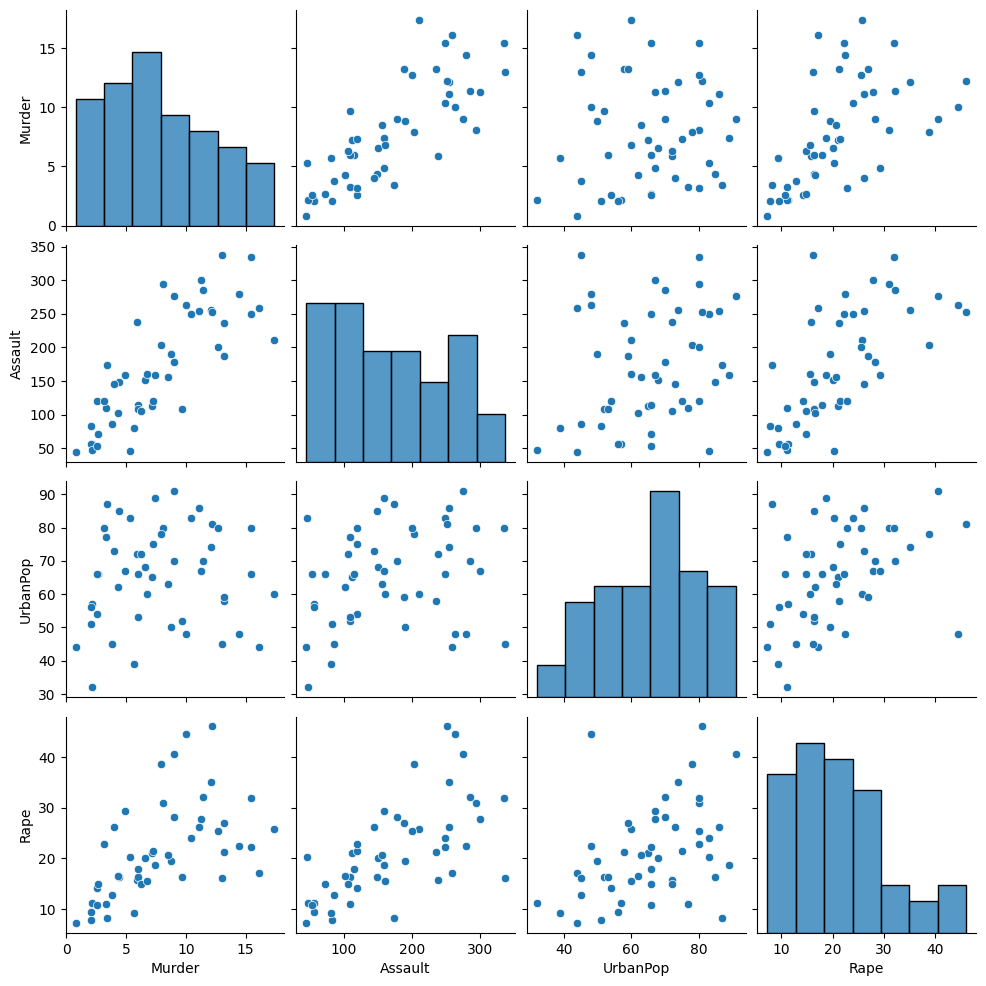

In [77]:
sns.pairplot(df)

There is correlation between different crimes e.g. areas that have a higher murder rate also have a higher instance of rape. 

However, it doesn't appear that the % of population living in urban areas has a strong impact on the crime rate. There is a little more correlation between % population in urban areas and instances of rape though. 

We can assess this correlation further through a correlation heatmap.

C:\Users\Bledi\AppData\Local\Temp\ipykernel_44520\3646156123.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = df.corr()


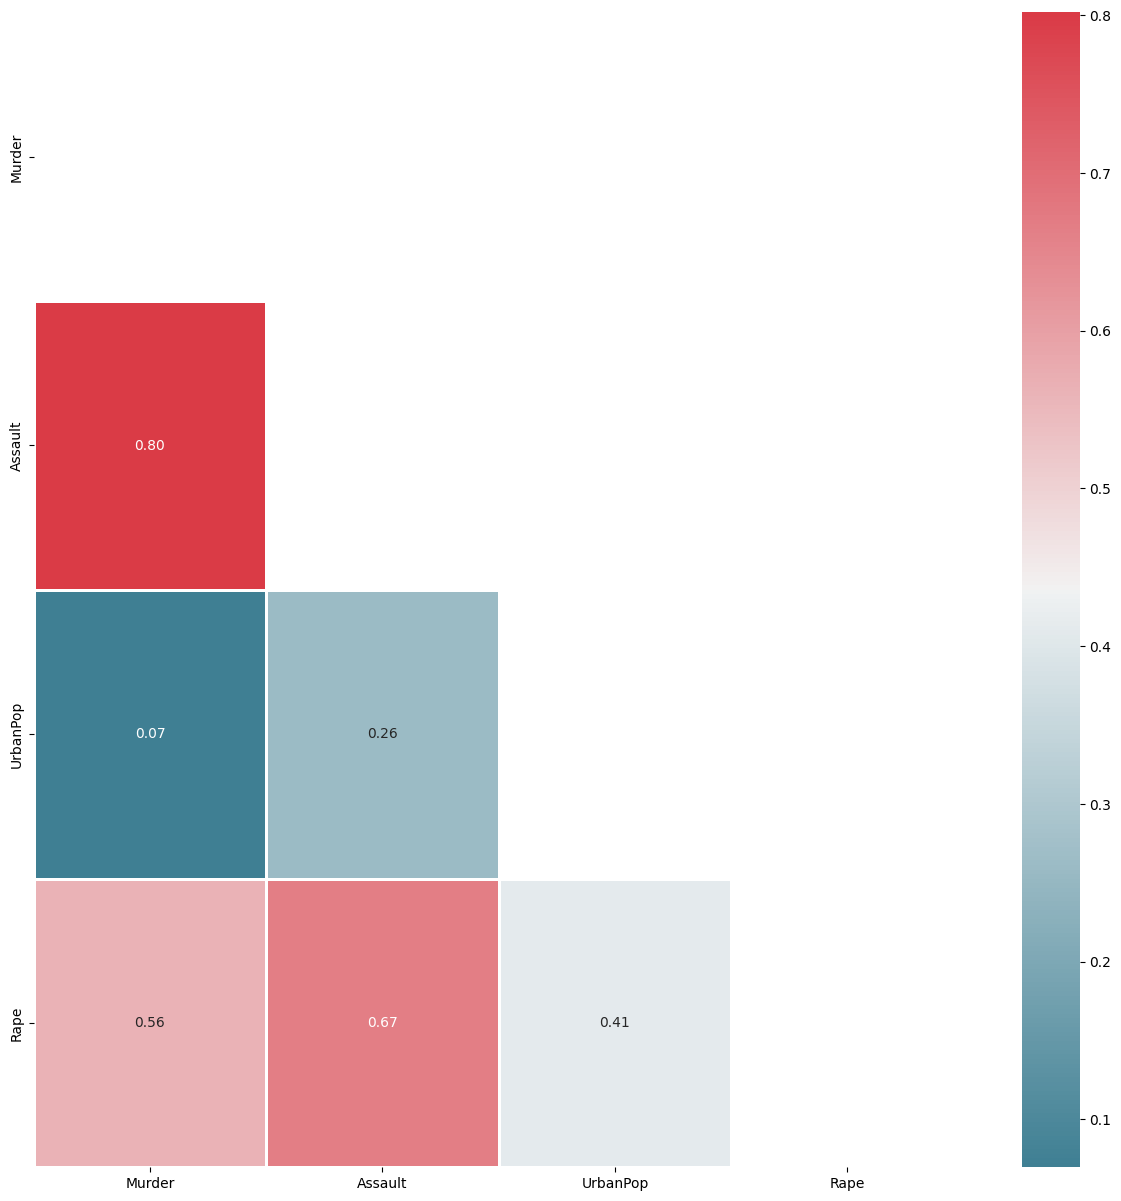

In [78]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(15, 15))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(df)

As described earlier, we can again see that states with high crimes rates are high across all categories and the population placement doesn't have an impact on these rates. 

Murder and assault have the highest correlation. These strong correlations between variables means clustering should be highly effective on this dataset. 

The pairplot earlier showed us that the data follows a normal distribution so I will now use StandardScaler to scale the data. 

In [79]:
#arrange the variables
X = df.iloc[:,1:].values

#scale the data
sc = StandardScaler()
sc.fit(X)


StandardScaler()

I am first going to use K-Means to view clusters within this dataset.

As we cannot make any assumptions about this data and do not know any complete trends, I am going to use the Elbow method to select a value for K.



c:\Users\Bledi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bledi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bledi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bledi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

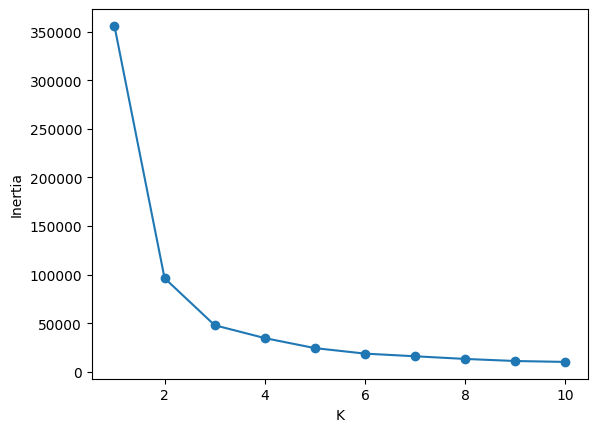

In [80]:
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r)
    kmeans.fit(x)    
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=123):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1,max_k+1)]
    plt.plot(range(1,11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

elbow_Kmeans(X)

The Elbow Method plot shows that 4 is the optimal number of clusters. Let's now apply that to a Kmeans cluster model.

In [81]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

y_kmeans

c:\Users\Bledi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 0, 2,
       3, 2, 0, 1, 1, 2, 3, 0, 2, 2, 2, 3, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1,
       3, 0, 0, 3, 3, 0])

Let's see these cluster predictions on a scatterplot. As the strongest correlation was between Assualt and Murder, I will look at those variables. 

<AxesSubplot: xlabel='Murder', ylabel='Assault'>

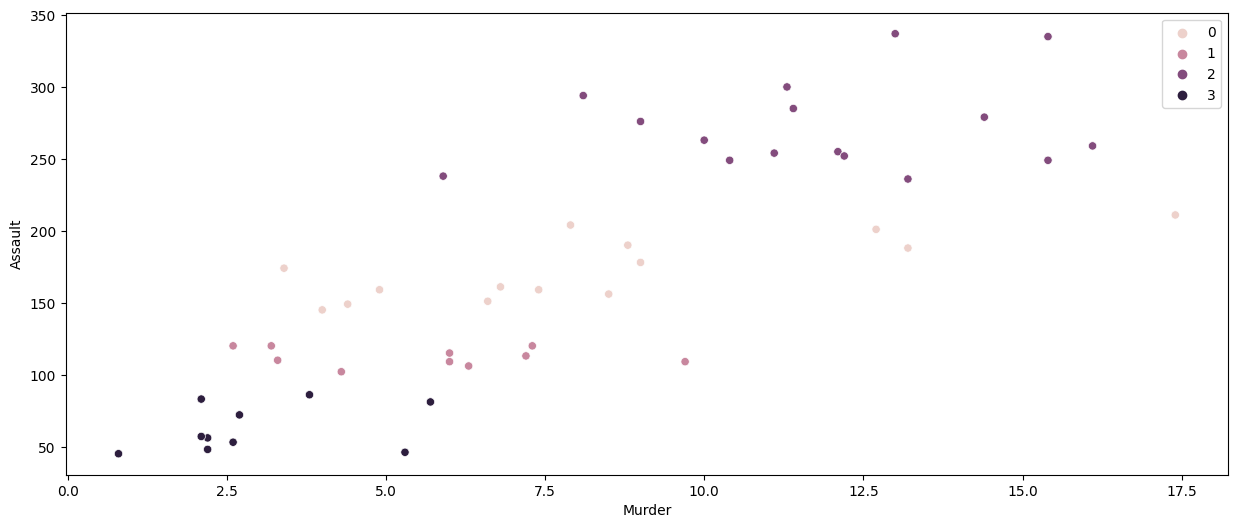

In [82]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['Murder'], y = df['Assault'],hue=y_kmeans)

In [83]:
#put predicted clusters into lists and apply to df
cluster = list(y_kmeans)
df['KMeans_cluster'] = cluster

# show mean of each cluster

cluster_mean = pd.DataFrame(round(df.groupby('KMeans_cluster').mean(),0))
cluster_mean

C:\Users\Bledi\AppData\Local\Temp\ipykernel_44520\3051245227.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_mean = pd.DataFrame(round(df.groupby('KMeans_cluster').mean(),0))


,Murder,Assault,UrbanPop,Rape
KMeans_cluster,,,,
0,8.0,173.0,71.0,23.0
1,6.0,112.0,66.0,17.0
2,12.0,273.0,68.0,28.0
3,3.0,63.0,54.0,12.0


Observations

Cluster 3 has the lowest crime rate in all categories aswell as the lowest % of population living in urban areas

Cluster 2 has the highes crime rate in all categories.

Cluster 1 has a similar urban pop % to cluster 2 and yet crime rate is almost half that of cluster 2. 

Next I plan to look at hierarchical clustering analysis to see if any further info can be gleamed from the dataset.

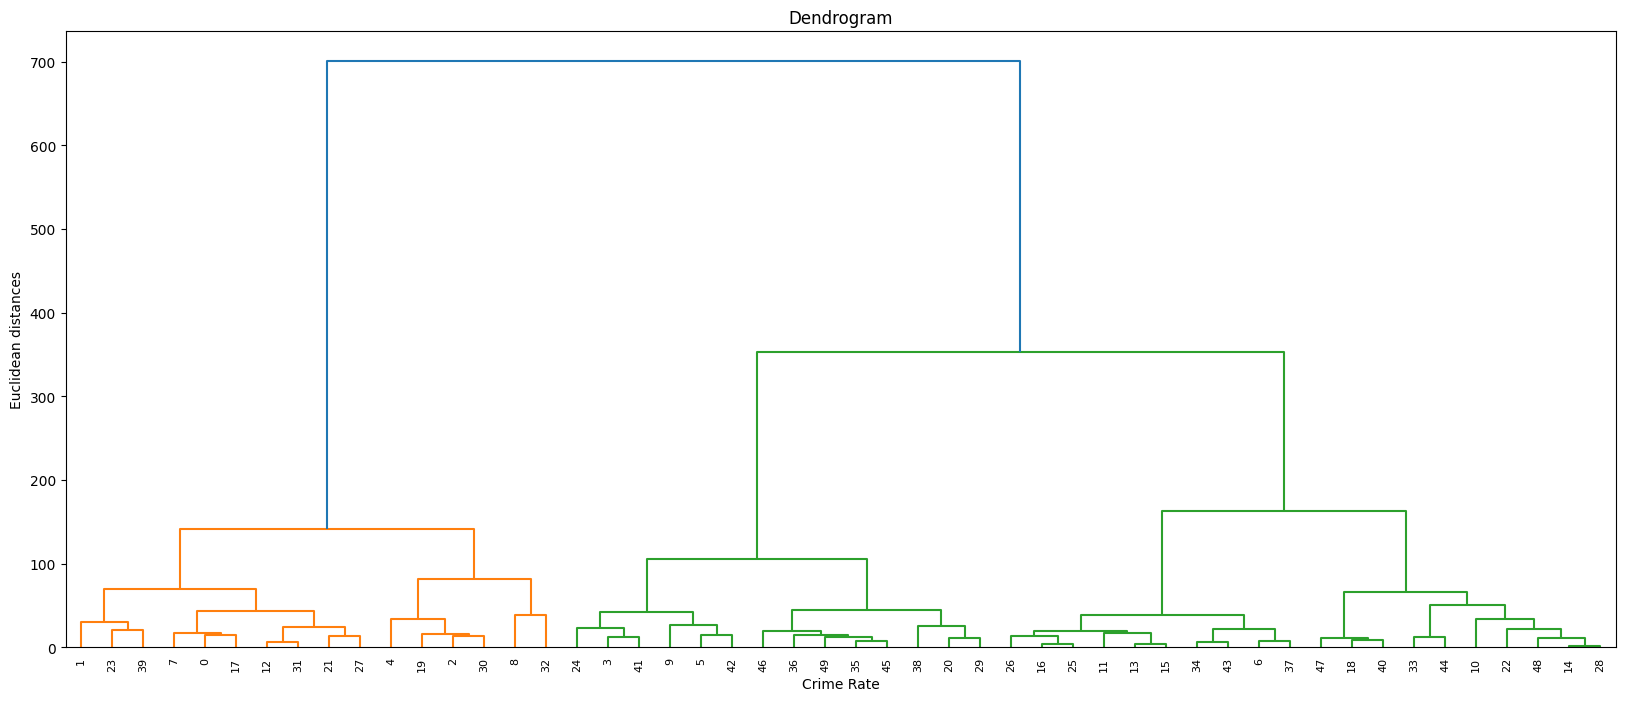

In [84]:
# With Ward method
plt.figure(figsize=(20,8))
dend_euclidean = dendrogram(linkage(X, method ='ward', metric='euclidean'))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

The dendrogram here suggests 3 clusters is more optimal for the dataset.

Let's fit those 3 clusters

In [85]:
# Fit the Agglomerative Clustering
 
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [86]:
# Fit and predict to have the cluster labels.
y_pred = AC.fit_predict(X)

y_pred

c:\Users\Bledi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

Let's again plot these predictions onto a scatterplot.

<AxesSubplot: xlabel='Murder', ylabel='Assault'>

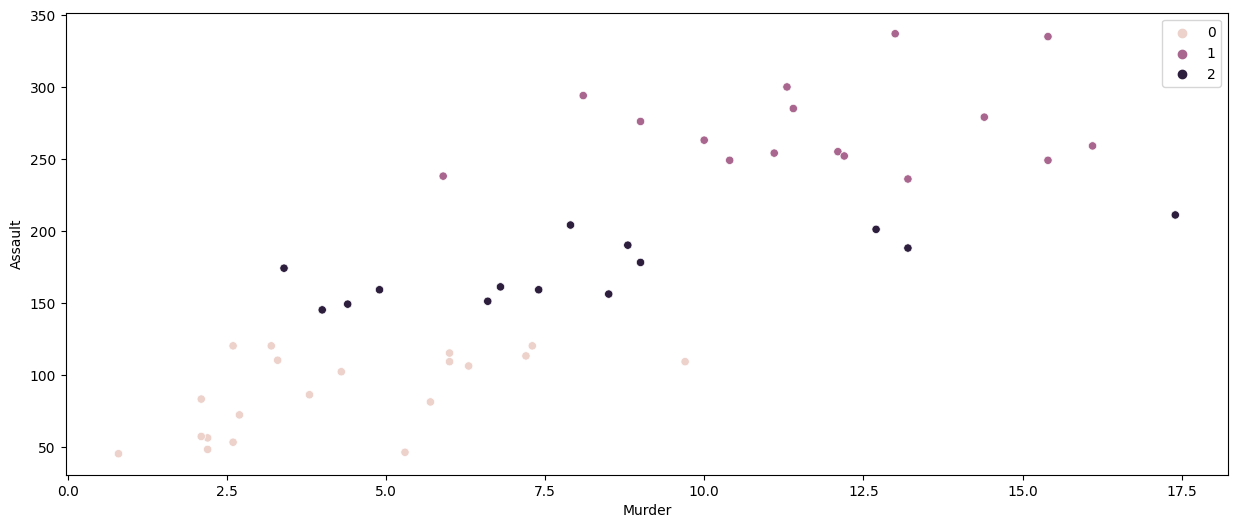

In [87]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['Murder'], y = df['Assault'],hue=y_pred)

In [88]:
#put predicted clusters into lists and apply to df
cluster2 = list(y_pred)
df['Agg_cluster'] = cluster2

# show mean of each cluster

cluster_mean2 = pd.DataFrame(round(df.groupby('Agg_cluster').mean(),0))
cluster_mean2

C:\Users\Bledi\AppData\Local\Temp\ipykernel_44520\1745664077.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_mean2 = pd.DataFrame(round(df.groupby('Agg_cluster').mean(),0))


,Murder,Assault,UrbanPop,Rape,KMeans_cluster
Agg_cluster,,,,,
0,4.0,88.0,60.0,14.0,2.0
1,12.0,273.0,68.0,28.0,2.0
2,8.0,173.0,71.0,23.0,0.0


In [89]:
cluster_mean2 = pd.DataFrame(round(df.groupby('KMeans_cluster').mean(),0))
cluster_mean2

C:\Users\Bledi\AppData\Local\Temp\ipykernel_44520\3746801855.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_mean2 = pd.DataFrame(round(df.groupby('KMeans_cluster').mean(),0))


,Murder,Assault,UrbanPop,Rape,Agg_cluster
KMeans_cluster,,,,,
0,8.0,173.0,71.0,23.0,2.0
1,6.0,112.0,66.0,17.0,0.0
2,12.0,273.0,68.0,28.0,1.0
3,3.0,63.0,54.0,12.0,0.0


Observations

Interestingly our Agg_cluster 1 is the same cluster as the KMeans cluster 2 and Agg-cluster 2 is the same cluster as the KMeans cluster 0.

This means Agg_cluster 0 is a combination of the KMeans cluster 1 and 3. 